In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
#pre processing
df = df.iloc[:, 1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
# EDA -> small data, so max that can be Shown is data kaisa diktha h?
import matplotlib.pyplot as plt

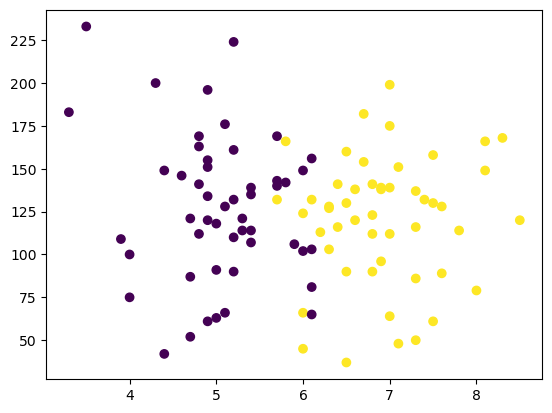

In [12]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
#for linear behaviour, types of data can be separated by line -> use logistic regression
# By doing EDA, we understood data is linear, classes can be separated linearly, so now logistic regression can be used
# EDA gives idea about data and how to proceed, no further scope in this data
# here feature selection is not major role as only two input columns and both are used, so ignore feature selection as this is toy data

In [ ]:
# step1: Extract input and output cols
#Extract input and output
#cgpa, iq -> independent, and placement = dependent

In [ ]:
X = df.iloc[:, 0:2] # independent
y = df.iloc[:, -1] # dependent

In [24]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [25]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [26]:
y.shape

(100,)

In [28]:
X.shape

(100, 2)

In [36]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.1)

In [37]:
X_train

,cgpa,iq
55,7.8,114.0
99,6.2,113.0
9,5.1,66.0
88,4.4,149.0
12,5.4,139.0
...,...,...
35,6.8,90.0
21,7.1,151.0
1,5.9,106.0
58,8.0,79.0


In [38]:
y_train

55    1
99    1
9     0
88    0
12    0
     ..
35    1
21    1
1     0
58    1
40    0
Name: placement, Length: 90, dtype: int64

In [39]:
X_test

,cgpa,iq
50,3.5,233.0
89,4.9,151.0
64,7.0,64.0
42,7.6,89.0
15,5.1,176.0
24,4.7,121.0
8,6.1,156.0
77,7.3,50.0
69,8.5,120.0
91,7.5,158.0


In [67]:
y_test

50    0
89    0
64    1
42    1
15    0
24    0
8     0
77    1
69    1
91    1
Name: placement, dtype: int64

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()

In [70]:
X_train = scaler.fit_transform(X_train)

In [71]:
X_train

array([[ 1.69302704, -0.22803859],
       [ 0.21637111, -0.25435074],
       [-0.79882984, -1.49102157],
       [-1.4448668 ,  0.6928865 ],
       [-0.52195685,  0.42976504],
       [ 0.86240808, -0.70165721],
       [-0.61424785, -0.04385358],
       [-1.16799382, -1.85939161],
       [ 0.86240808,  0.42976504],
       [-0.61424785, -0.22803859],
       [ 0.4009531 , -0.1754143 ],
       [ 1.50844505,  0.14033144],
       [-0.52195685, -0.22803859],
       [-0.70653884, -0.85953008],
       [ 0.77011708, -0.28066288],
       [-0.98341183,  1.92955733],
       [-0.24508387,  0.24558002],
       [ 0.12408012, -1.51733372],
       [-0.70653884,  1.00863224],
       [ 0.03178912,  0.6928865 ],
       [ 0.77011708,  0.48238933],
       [-1.07570282,  1.2191294 ],
       [ 0.12408012, -1.09633939],
       [ 0.4009531 ,  0.48238933],
       [-0.89112083, -0.12279001],
       [ 0.86240808,  0.4034529 ],
       [ 0.58553509, -0.07016572],
       [-0.79882984,  0.14033144],
       [-0.98341183,

In [72]:
X_test = scaler.transform(X_test)

In [73]:
X_test

array([[-2.27548576,  2.90310671],
       [-0.98341183,  0.74551079],
       [ 0.95469907, -1.54364586],
       [ 1.50844505, -0.88584223],
       [-0.79882984,  1.40331442],
       [-1.16799382, -0.04385358],
       [ 0.12408012,  0.87707151],
       [ 1.23157206, -1.9120159 ],
       [ 2.339064  , -0.07016572],
       [ 1.41615405,  0.9296958 ]])

In [74]:
y_train

55    1
99    1
9     0
88    0
12    0
     ..
35    1
21    1
1     0
58    1
40    0
Name: placement, Length: 90, dtype: int64

In [75]:
y_test

50    0
89    0
64    1
42    1
15    0
24    0
8     0
77    1
69    1
91    1
Name: placement, dtype: int64

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
clf = LogisticRegression()

In [78]:
# model training
clf.fit(X_train, y_train)

LogisticRegression()

In [79]:
y_pred = clf.predict(X_test)

In [80]:
y_test

50    0
89    0
64    1
42    1
15    0
24    0
8     0
77    1
69    1
91    1
Name: placement, dtype: int64

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_test, y_pred)

0.9

In [99]:
!pip install mlxtend

In [100]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

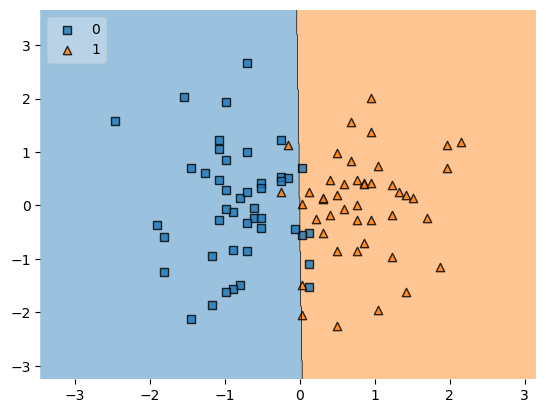

In [101]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [102]:
import pickle

In [103]:
pickle.dump(clf, open('model.pkl', 'wb'))